In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import collections
import seaborn as sns       # package for better viewing of networks
import operator 

#Need to load file: "BuildingNetworks.py" before calculating the centralities with the following script:
# file_path/NetworkBuilding.py
#%load /Users/iris/Documents/QMUL-2018/Individual_Project/coding/my_codes/NetworkBuilding.py

from NetworkBuilding import build_network_from_excel, build_network_from_df

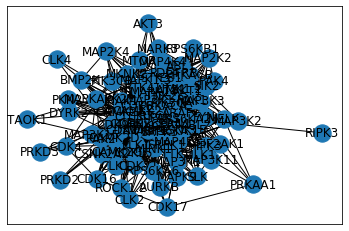

{'PRKCI': 0.03003449016418678, 'CAMKK2': 0.02419179929884024, 'CAMK2A': 0.023778042510814612, 'PAK3': 0.021509950639739688, 'CIT': 0.02054819966324781, 'RPS6KA2': 0.01998448519125357, 'TAOK3': 0.019424998430831657, 'PLK1': 0.019095348830860826, 'PRKACA': 0.01897306838078205, 'PHKG2': 0.018636832526410605}


13

In [4]:
"""Functions to Get Top 10 hubs Using 4 Different Centrality Calculations from One Single Network and save results to file"""  

# Function to Find Top Results 
def get_top_keys(dictionary, top):
    items = dictionary.items()
    items = sorted(items, reverse=True, key=lambda x: x[1])
    #items.sort(reverse=True, key=lambda x: x[1])
    return {x[0]:x[1] for x in items[:top]}

# Function to calculate top centralities
def top_centralities(cell_line):
    #build network
    G_kinaseNetwork = build_network_from_excel(file_path = "/Users/iris/Documents/QMUL-2018/Individual_Project/coding/datasets/mcf7_ntera2_hl60_ksea.xlsm",key="HL60", sheet_name = "zScorenodes.edges", threshold = 0.2)

    # Betweenness centrality
    G_kinaseNetwork_bet_cen = nx.betweenness_centrality(G_kinaseNetwork)
    # Closeness centrality
    G_kinaseNetwork_clo_cen = nx.closeness_centrality(G_kinaseNetwork)
    # Eigenvector centrality
    G_kinaseNetwork_eig_cen = nx.eigenvector_centrality(G_kinaseNetwork)
    # Page Rank centrality
    G_kinaseNetwork_pag_cen = nx.pagerank(G_kinaseNetwork,alpha=0.9)

    # Get tops (G_kinaseNetwork_bet_cen)
    top_bet_cen = get_top_keys(G_kinaseNetwork_bet_cen,10)
    top_clo_cen = get_top_keys(G_kinaseNetwork_clo_cen,10)
    top_eig_cen = get_top_keys(G_kinaseNetwork_eig_cen,10)
    top_pag_cen = get_top_keys(G_kinaseNetwork_pag_cen,10)
    print (top_pag_cen)
    
    # Save to dataframes
    top_bet_cen_df = pd.DataFrame.from_dict(top_bet_cen,orient="index",columns=["Centrality"]).reset_index(level=0)
    top_clo_cen_df = pd.DataFrame.from_dict(top_clo_cen,orient="index",columns=["Centrality"]).reset_index(level=0)
    top_eig_cen_df = pd.DataFrame.from_dict(top_eig_cen,orient="index",columns=["Centrality"]).reset_index(level=0)
    top_pag_cen_df = pd.DataFrame.from_dict(top_pag_cen,orient="index",columns=["Centrality"]).reset_index(level=0)

    #Save to files
    top_bet_cen_df.to_csv("/Users/iris/Documents/QMUL-2018/Individual_Project/coding/analysis_results/{}_top_bet_count.csv".format(cell_line),header=None)
    top_clo_cen_df.to_csv("/Users/iris/Documents/QMUL-2018/Individual_Project/coding/analysis_results/{}_top_clo_count.csv".format(cell_line),header=None)
    top_eig_cen_df.to_csv("/Users/iris/Documents/QMUL-2018/Individual_Project/coding/analysis_results/{}_top_eig_count.csv".format(cell_line),header=None)
    top_pag_cen_df.to_csv("/Users/iris/Documents/QMUL-2018/Individual_Project/coding/analysis_results/{}_top_pag_count.csv".format(cell_line),header=None)
    
    return {"bet":top_bet_cen_df,"clo":top_clo_cen_df,"eig":top_eig_cen_df,"pag":top_pag_cen_df}

#change cell lines here
HL60_top_cen = top_centralities("HL60")

unique=list(set(pd.concat([HL60_top_cen["bet"]['index'],HL60_top_cen["clo"]['index'],HL60_top_cen["eig"]['index'],HL60_top_cen["pag"]['index']])))
palette = dict(zip(unique, sns.husl_palette(n_colors=len(unique))))
len(unique)



In [2]:
"""Functions to Get Different Centrality Calculations from One Single Network and save results to file"""  
# Function to calculate centralities
def centralities(cell_line):
    #build network
    G_kinaseNetwork = build_network_from_excel(file_path = "/Users/iris/Documents/QMUL-2018/Individual_Project/coding/datasets/mcf7_ntera2_hl60_ksea.xlsm",key="HL60", sheet_name = "zScorenodes.edges", threshold = 0.2)
    
    # Betweenness centrality
    G_kinaseNetwork_bet_cen = nx.betweenness_centrality(G_kinaseNetwork)
    # Closeness centrality
    G_kinaseNetwork_clo_cen = nx.closeness_centrality(G_kinaseNetwork)
    # Eigenvector centrality
    G_kinaseNetwork_eig_cen = nx.eigenvector_centrality(G_kinaseNetwork)
    # Page Rank centrality
    G_kinaseNetwork_pag_cen = nx.pagerank(G_kinaseNetwork,alpha=0.9)

    # Get tops (G_kinaseNetwork_bet_cen)
    top_bet_cen = get_top_keys(G_kinaseNetwork_bet_cen,10)
    top_clo_cen = get_top_keys(G_kinaseNetwork_clo_cen,10)
    top_eig_cen = get_top_keys(G_kinaseNetwork_eig_cen,10)
    top_pag_cen = get_top_keys(G_kinaseNetwork_pag_cen,10)
    
    # Save to dataframes
    bet_cen_df = pd.DataFrame.from_dict(G_kinaseNetwork_bet_cen,orient="index",columns=["Centrality"]).reset_index(level=0)
    clo_cen_df = pd.DataFrame.from_dict(G_kinaseNetwork_clo_cen,orient="index",columns=["Centrality"]).reset_index(level=0)
    eig_cen_df = pd.DataFrame.from_dict(G_kinaseNetwork_eig_cen,orient="index",columns=["Centrality"]).reset_index(level=0)
    pag_cen_df = pd.DataFrame.from_dict(G_kinaseNetwork_pag_cen,orient="index",columns=["Centrality"]).reset_index(level=0)

    #Save to files
    bet_cen_df.to_csv("/Users/iris/Documents/QMUL-2018/Individual_Project/coding/analysis_results/{}_bet_count.csv".format(cell_line),header=None)
    clo_cen_df.to_csv("/Users/iris/Documents/QMUL-2018/Individual_Project/coding/analysis_results/{}_clo_count.csv".format(cell_line),header=None)
    eig_cen_df.to_csv("/Users/iris/Documents/QMUL-2018/Individual_Project/coding/analysis_results/{}_eig_count.csv".format(cell_line),header=None)
    pag_cen_df.to_csv("/Users/iris/Documents/QMUL-2018/Individual_Project/coding/analysis_results/{}_pag_count.csv".format(cell_line),header=None)
    
    return {"bet":bet_cen_df,"clo":clo_cen_df,"eig":eig_cen_df,"pag":pag_cen_df}

#change cell lines here
HL60_cen = centralities("HL60")


NameError: name 'build_network_from_excel' is not defined

{'HL60_bet_count': '/Users/iris/Documents/QMUL-2018/Individual_Project/coding/analysis_results/HL60_bet_count.csv'}


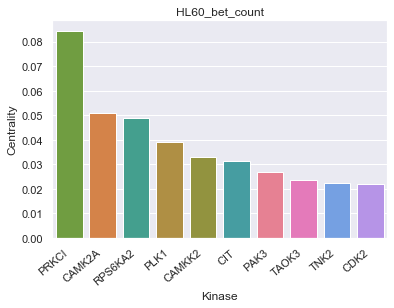

In [7]:
# Specify the result files and draw plots
data_folder='/Users/iris/Documents/QMUL-2018/Individual_Project/coding/analysis_results'
csv_files={ file.split('.')[0]:os.path.join(data_folder,file) for file in os.listdir(data_folder) if file.startswith("HL60_bet_count.csv")}    # Specify the results to be plot
sns.set(style="darkgrid")
print (csv_files)

df = dict()

for name,path in csv_files.items():
    df[name]=pd.read_csv(path,header=None,names=["Kinase","Centrality"])
    df[name]
    bar_plot=sns.barplot(x="Kinase",y="Centrality",palette=palette,
                data=df[name].sort_values(by="Centrality",
                                          ascending=False).head(10))
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=40, ha="right")
    bar_plot.set_title(name)
    
    plt.savefig(data_folder+"{}.png".format(name))
    plt.show()
